In [1]:
import pandas as pd

In [16]:
df = pd.read_csv("D:/Travel Time Prediction/truck 2019 3hr split/start_stop/1.csv",parse_dates=["datetime"])
df = df.set_index("datetime")
df = df.resample("3H").mean()
df = df.between_time("0:00","20:00")
df

delta_t  number_of_truck          std
datetime                                                       
2019-01-01 00:00:00  16967.333333              3.0  4128.729748
2019-01-01 03:00:00  14931.888889              9.0  2312.959060
2019-01-01 06:00:00  16371.625000              8.0  2043.846370
2019-01-01 09:00:00  17453.111111              9.0  4570.677178
2019-01-01 12:00:00  16146.857143             14.0  1893.129963
...                           ...              ...          ...
2019-12-31 06:00:00  16250.800000              5.0  4673.914387
2019-12-31 09:00:00  16458.500000              4.0  3088.273358
2019-12-31 12:00:00  15722.000000              6.0  3948.224056
2019-12-31 15:00:00  16483.555556              9.0  2611.701079
2019-12-31 18:00:00  16805.000000              1.0          NaN

[2555 rows x 3 columns]

In [10]:
time = pd.date_range("2019-01-01","2020-01-01" ,freq="3H")
comp = pd.DataFrame({"delta_t":None,"day_of_week":None},index=time)
comp = comp[:-1]
comp = comp.between_time("0:00","20:00")
comp

delta_t day_of_week
2019-01-01 00:00:00    None        None
2019-01-01 03:00:00    None        None
2019-01-01 06:00:00    None        None
2019-01-01 09:00:00    None        None
2019-01-01 12:00:00    None        None
...                     ...         ...
2019-12-31 06:00:00    None        None
2019-12-31 09:00:00    None        None
2019-12-31 12:00:00    None        None
2019-12-31 15:00:00    None        None
2019-12-31 18:00:00    None        None

[2555 rows x 2 columns]

In [18]:
road = ["1","2","4","7","9","32","35","41","304","331"]
for filenumber in road:
    df = pd.read_csv("D:/Travel Time Prediction/truck 2019 3hr split/start_stop/"+filenumber+".csv",parse_dates=["datetime"])
    df = df.set_index("datetime")
    df = df.resample("3H").mean()
    df = df.between_time("0:00","20:00")

    #create fill missing hour
    # time = pd.date_range("2019-01-01","2020-01-01" ,freq="3H")
    # comp = pd.DataFrame({"delta_t":None,"day_of_week":None},index=time)
    # comp = comp[:-1]
    # comp = comp.between_time("0:00","20:00")
    # comp

    #merge and filter 
    df = df.combine_first(comp)
   # df = df.between_time("0:00","20:00")

    #create datetime column
    df = df.reset_index()
    df = df.rename(columns={"index":"datetime"})

    #fillnan
    df["datetime"] = pd.to_datetime(df["datetime"])
    df["day_of_week"] = pd.to_datetime(df["datetime"]).dt.day_name()

    #fill day of week 

    df1 = df.copy()
    df1["delta_t"] = df1["delta_t"].interpolate(method="linear").bfill()
    #interpolate delta time
    for i in range(len(df1)):
        if df1.loc[i,"delta_t"] == None  :
            df1.loc[i,"delta_t"] =  df1.loc[i,"delta_t"].interpolate(method="linear").bfill()

    #export to csv
    #df1 = df1[(df1["datetime"] < "2019-07-29")  | (df1["datetime"] >= "2019-08-10")]
    #df1 = df1.reset_index(drop=True)
    df1.to_csv("D:/Travel Time Prediction/time_series 3hr/"+filenumber+".csv",index=False)


In [9]:
df1

datetime day_of_week      delta_t  number_of_truck  \
0    2019-01-01 00:00:00     Tuesday  5459.666667              0.0   
1    2019-01-01 01:00:00     Tuesday  5459.666667              NaN   
2    2019-01-01 02:00:00     Tuesday  5459.666667              NaN   
3    2019-01-01 03:00:00     Tuesday  5459.666667              3.0   
4    2019-01-01 04:00:00     Tuesday  5599.819444              NaN   
...                  ...         ...          ...              ...   
6930 2019-12-31 14:00:00     Tuesday  5330.444444              NaN   
6931 2019-12-31 15:00:00     Tuesday  4949.000000              3.0   
6932 2019-12-31 16:00:00     Tuesday  4949.000000              NaN   
6933 2019-12-31 17:00:00     Tuesday  4949.000000              NaN   
6934 2019-12-31 18:00:00     Tuesday  4949.000000              0.0   

              std  
0             NaN  
1             NaN  
2             NaN  
3      931.265984  
4             NaN  
...           ...  
6930          NaN  
6931  1058.538143  
6932          NaN  
6933          NaN  
6934          NaN  

[6935 rows x 5 columns]

In [157]:
tmp = df1[(df1["datetime"] >= "2019-07-01")  & (df1["datetime"] <= "2019-08-01")]
tmp

datetime      delta_t  day_of_week
3801 2019-07-01 00:00:00  4316.666667          0.0
3802 2019-07-01 01:00:00  4619.000000          0.0
3803 2019-07-01 02:00:00  5450.000000          0.0
3804 2019-07-01 03:00:00  5631.900000          0.0
3805 2019-07-01 04:00:00  4929.625000          0.0
...                  ...          ...          ...
4384 2019-07-28 16:00:00  4970.285714          6.0
4385 2019-07-28 17:00:00  5235.846154          6.0
4386 2019-07-28 18:00:00  4932.550000          6.0
4387 2019-07-28 19:00:00  5252.600000          6.0
4388 2019-07-28 20:00:00  4961.619048          6.0

[588 rows x 3 columns]

<AxesSubplot:title={'center':'linear-01'}>

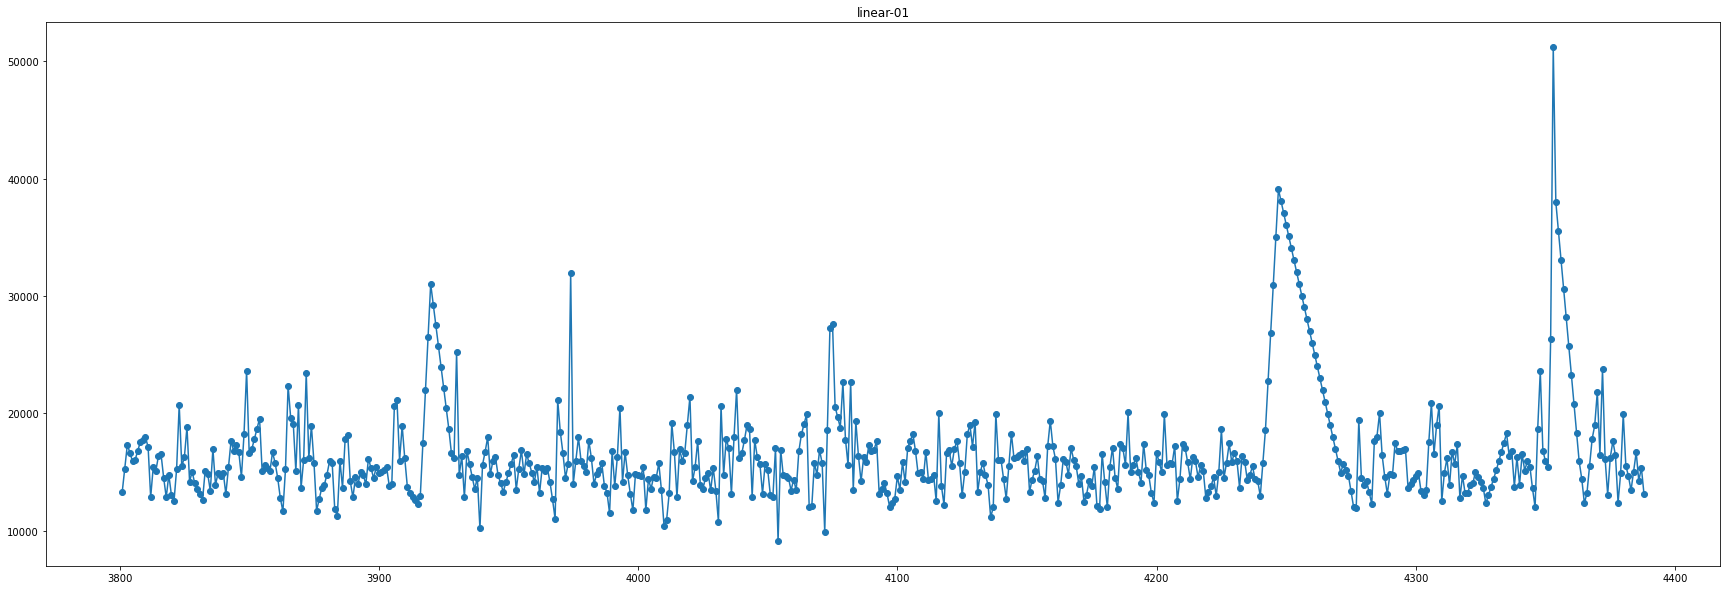

In [105]:
tmp = df1[(df1["datetime"] >= "2019-07-1")  & (df1["datetime"] <= "2019-08-01")]
#tmp["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 10))
tmp["delta_t"].plot(title='linear-01', marker='o', figsize=(30, 10))


#Visualize time interval in each month

In [10]:
import matplotlib.pyplot as plt
import datetime

In [76]:
tmp = df[(df['datetime'] >= "2019-10-01") & (df['datetime'] < "2019-11-01")]
tmp

datetime       delta_t  day_of_week
5733 2019-10-01 00:00:00  19896.250000          1.0
5734 2019-10-01 01:00:00  23192.500000          1.0
5735 2019-10-01 02:00:00  19486.000000          1.0
5736 2019-10-01 03:00:00  17582.500000          1.0
5737 2019-10-01 04:00:00  20698.000000          1.0
...                  ...           ...          ...
6379 2019-10-31 16:00:00  13204.666667          3.0
6380 2019-10-31 17:00:00  15685.000000          3.0
6381 2019-10-31 18:00:00  14911.857143          3.0
6382 2019-10-31 19:00:00  13440.000000          3.0
6383 2019-10-31 20:00:00  11461.000000          3.0

[651 rows x 3 columns]

In [35]:
li = ["01","02","03","04","05","06","07","08","09","10","11","12"]
month = []
for i in range(len(li)):
    if i <= len(li)-2:
        month.append(df[(df['datetime'] >= "2019-"+ li[i] + "-01") & (df['datetime'] < "2019-" + li[i+1] + "-01")])
    else:
        month.append(df[(df['datetime'] >= "2019-"+ li[i] + "-01") & (df['datetime'] < "2020-01-01")])

<AxesSubplot:title={'center':'linear-01'}>

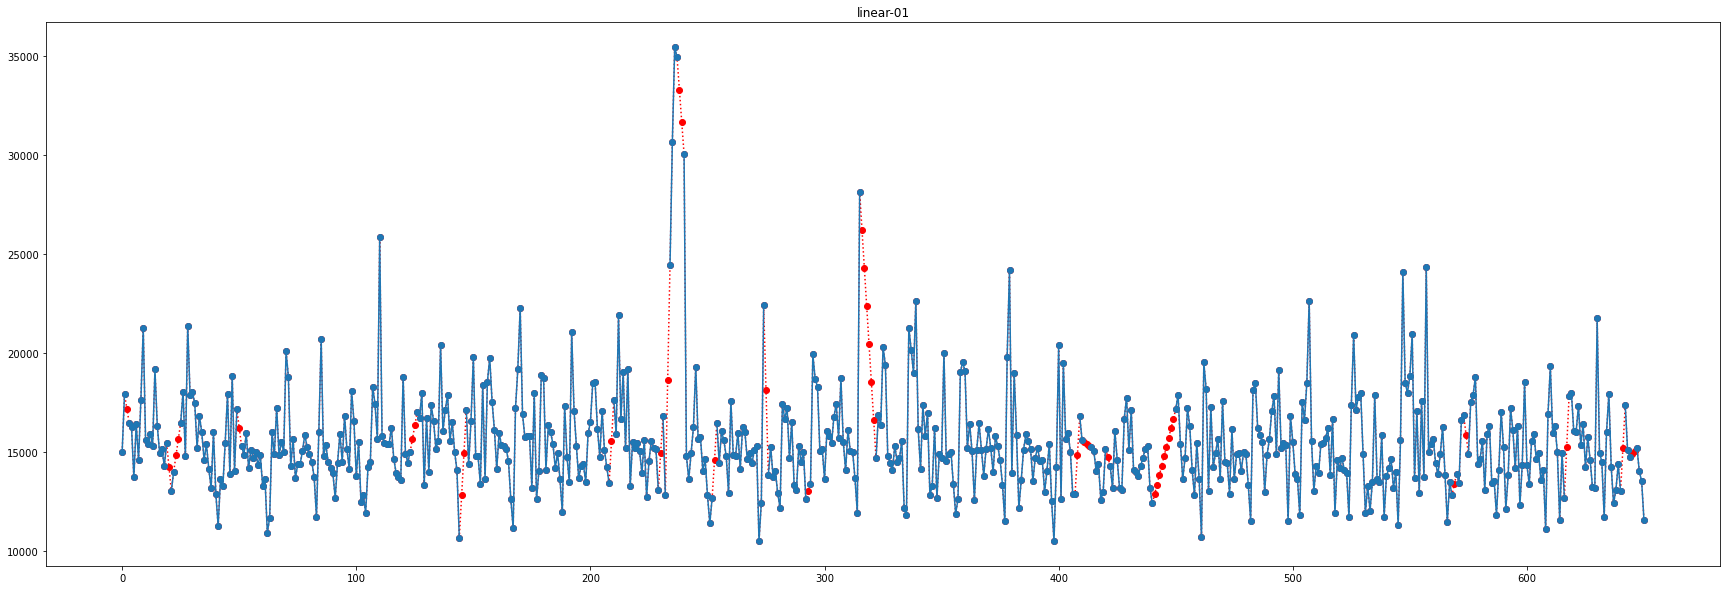

In [71]:
tmp_linear = month[0].copy()
tmp_linear["delta_t"] = tmp_linear["delta_t"].interpolate(method="linear")

tmp_linear["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 10))
month[0]["delta_t"].plot(title='linear-01', marker='o', figsize=(30, 10))


<AxesSubplot:title={'center':'linear-02'}>

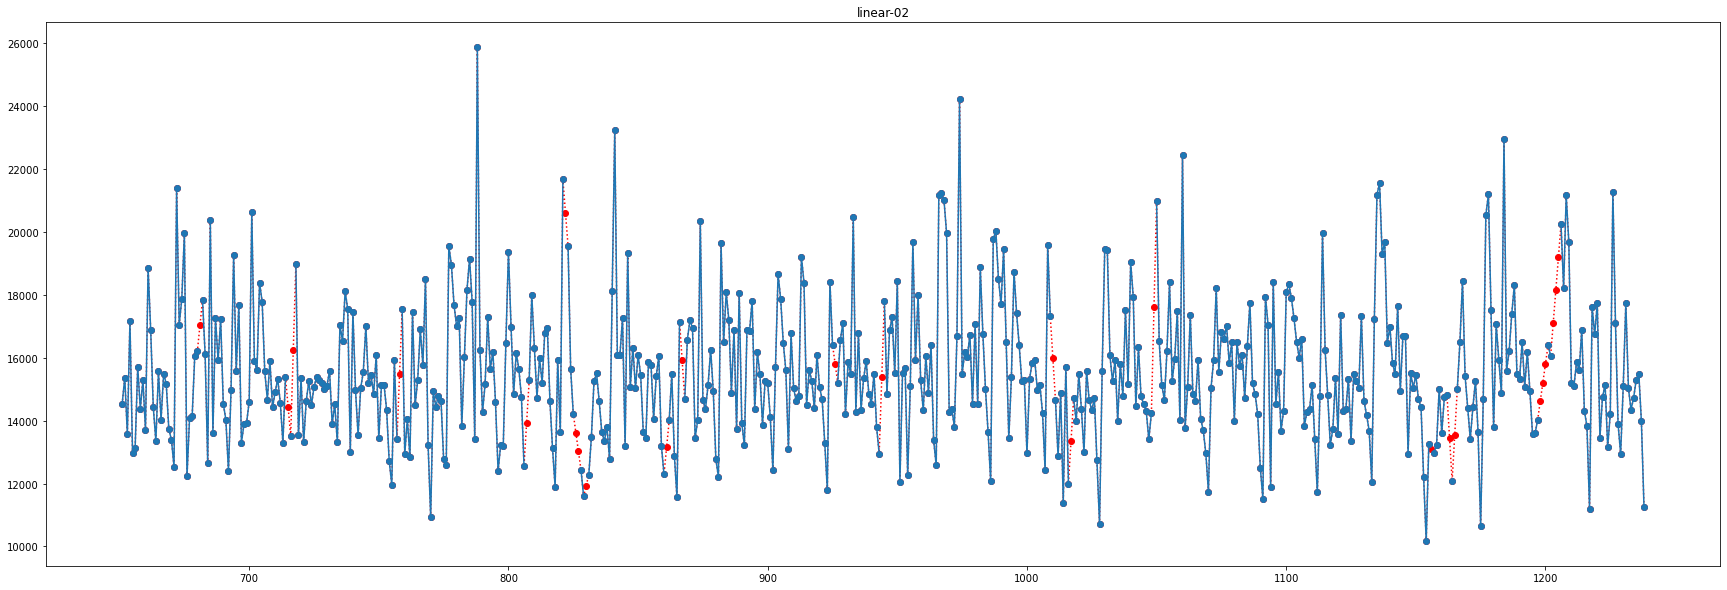

In [72]:
tmp_linear = month[1].copy()
tmp_linear["delta_t"] = tmp_linear["delta_t"].interpolate(method="linear")

tmp_linear["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 10))
month[1]["delta_t"].plot(title='linear-02', marker='o', figsize=(30, 10))


<AxesSubplot:title={'center':'linear-03'}>

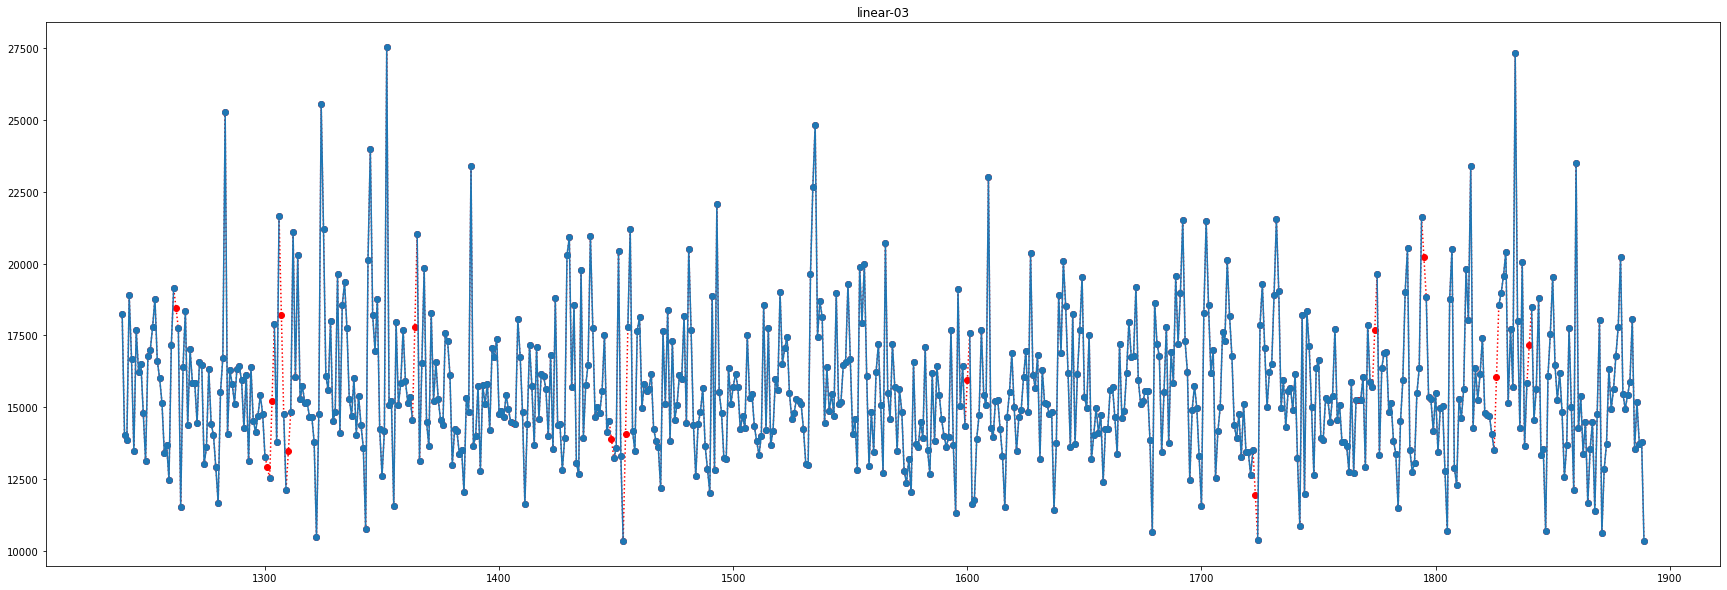

In [73]:
tmp_linear = month[2].copy()
tmp_linear["delta_t"] = tmp_linear["delta_t"].interpolate(method="linear")

tmp_linear["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 10))
month[2]["delta_t"].plot(title='linear-03', marker='o', figsize=(30, 10))


<AxesSubplot:title={'center':'linear'}>

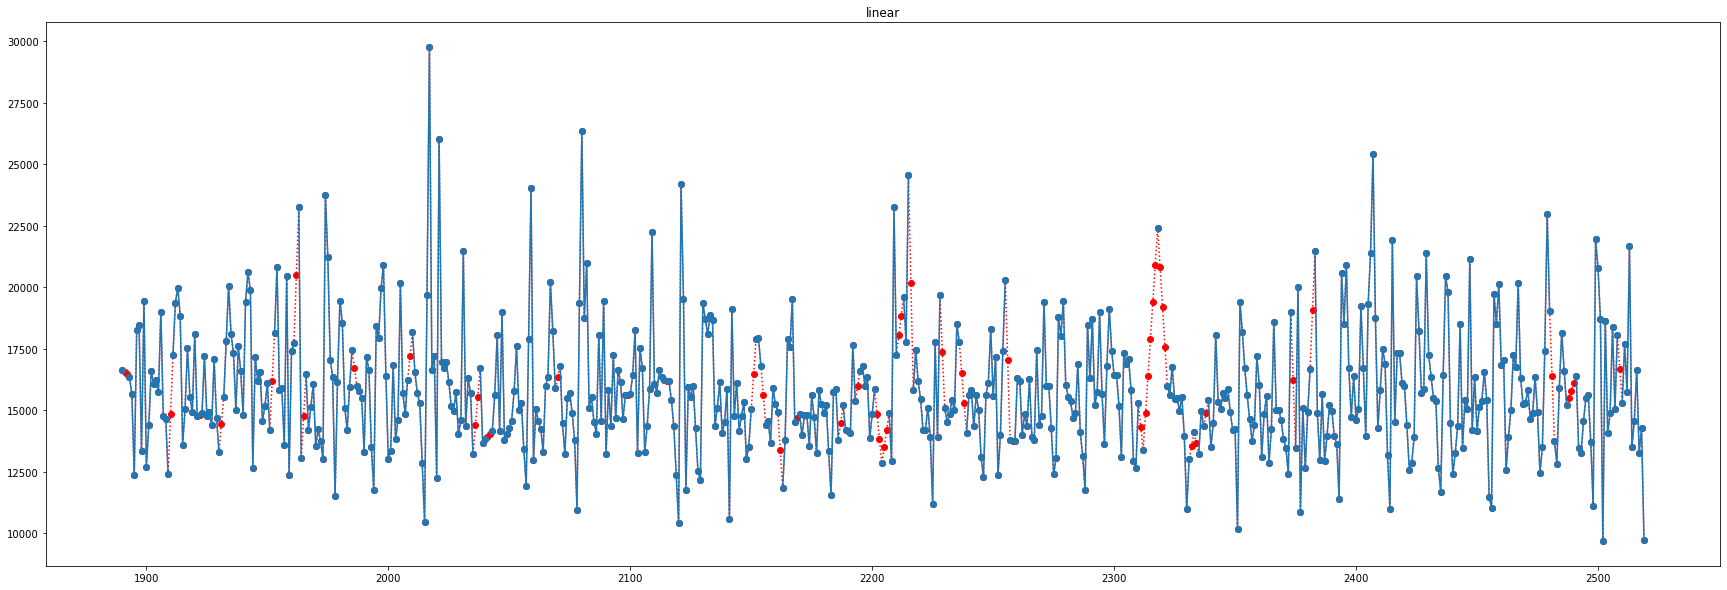

In [54]:
tmp_linear = month[3].copy()
tmp_linear["delta_t"] = tmp_linear["delta_t"].interpolate(method="linear")

tmp_linear["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 10))
month[3]["delta_t"].plot(title='linear-04', marker='o', figsize=(30, 10))


<AxesSubplot:title={'center':'linear'}>

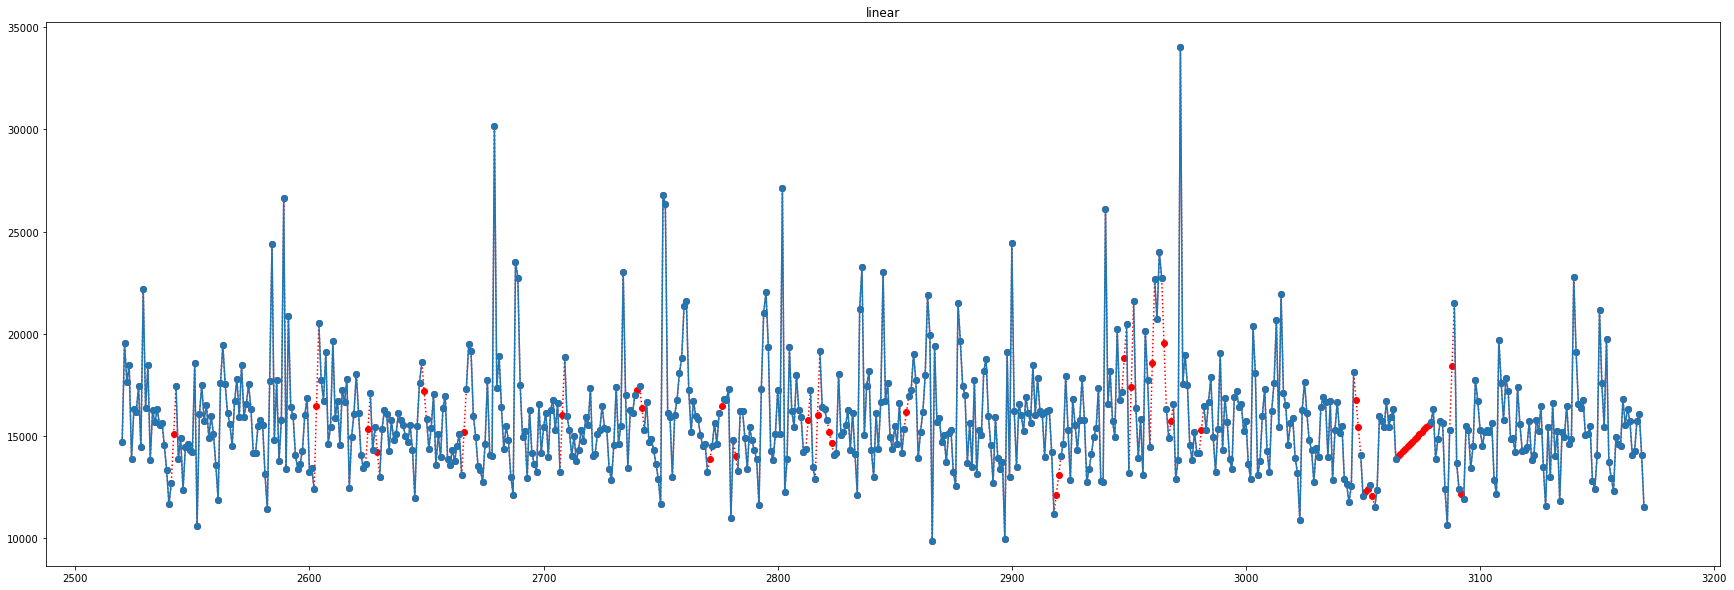

In [55]:
tmp_linear = month[4].copy()
tmp_linear["delta_t"] = tmp_linear["delta_t"].interpolate(method="linear")

tmp_linear["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 10))
month[4]["delta_t"].plot(title='linear-05', marker='o', figsize=(30, 10))


<AxesSubplot:title={'center':'linear-06'}>

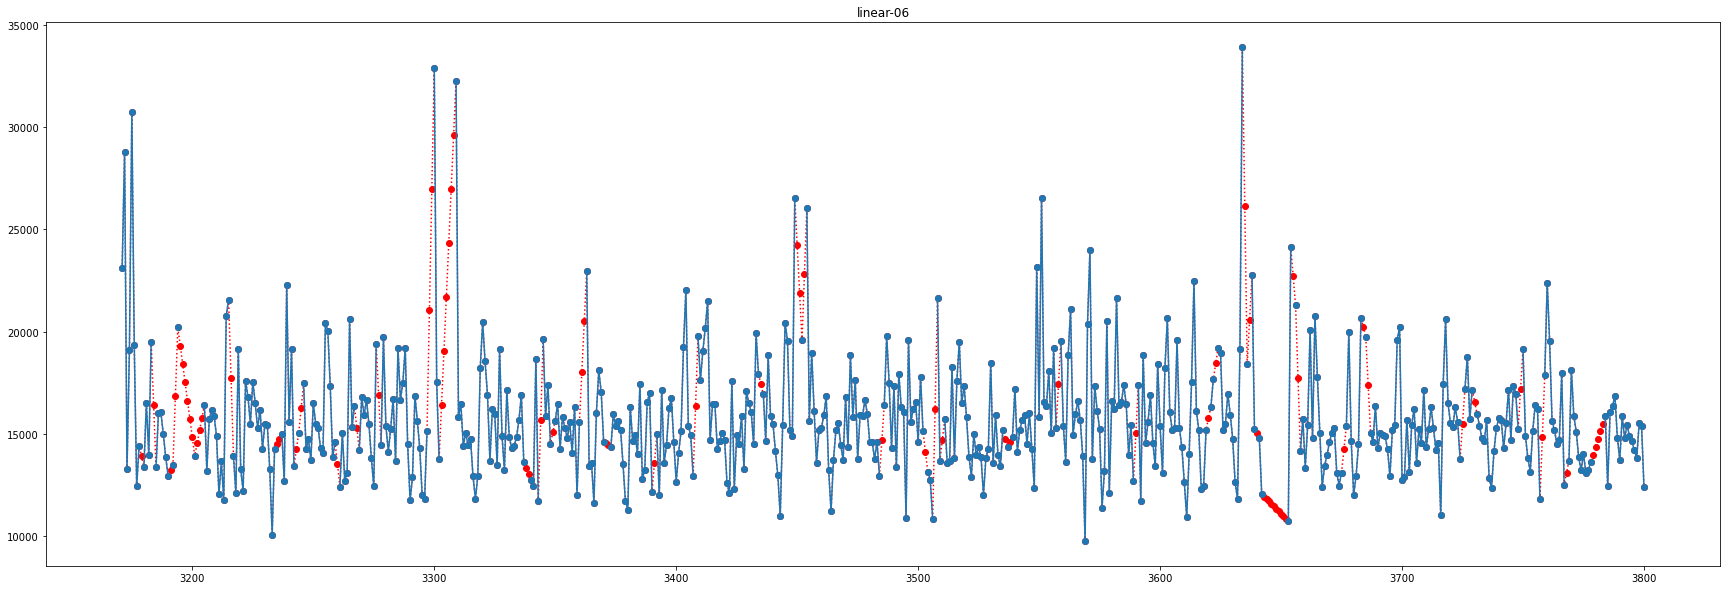

In [70]:
tmp_linear = month[5].copy()
tmp_linear["delta_t"] = tmp_linear["delta_t"].interpolate(method="linear")

tmp_linear["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 10))
month[5]["delta_t"].plot(title='linear-06', marker='o', figsize=(30, 10))


<AxesSubplot:title={'center':'linear-07'}>

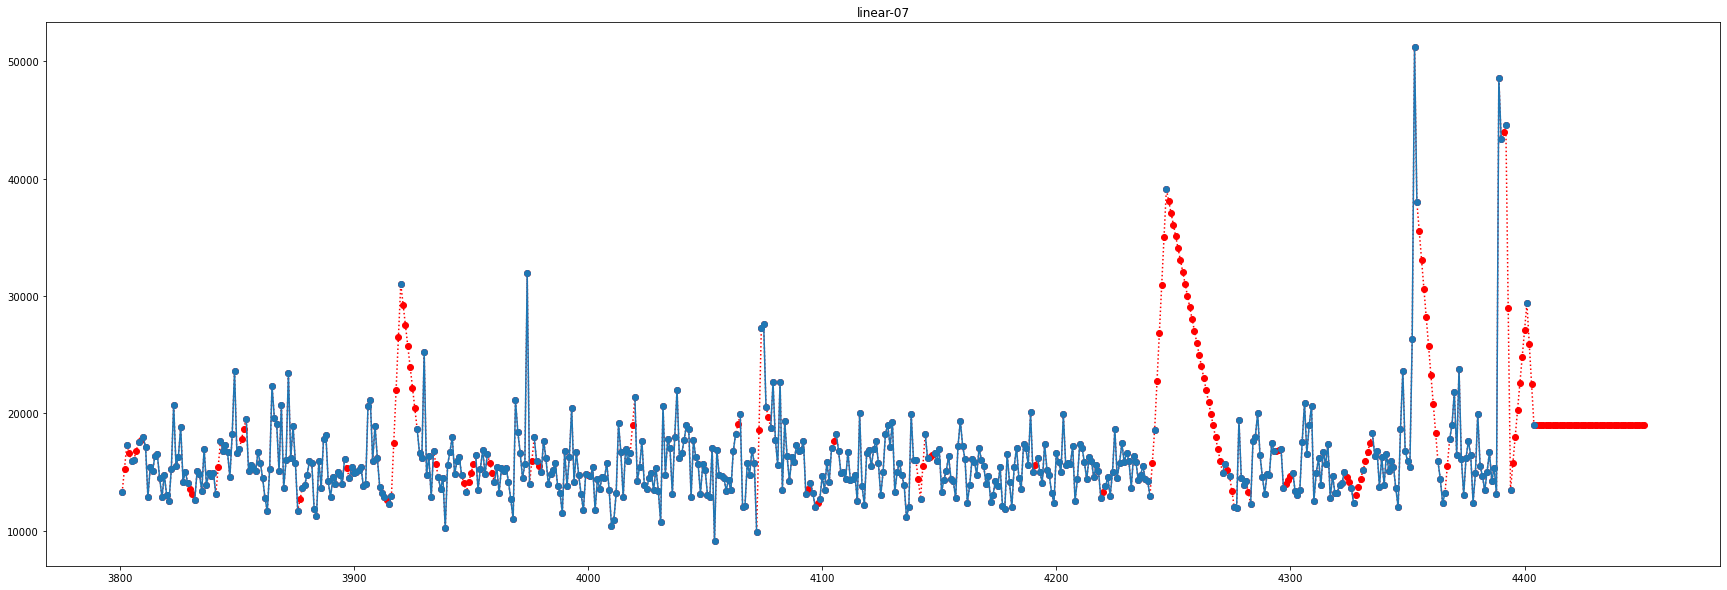

In [69]:
tmp_linear = month[6].copy()
tmp_linear["delta_t"] = tmp_linear["delta_t"].interpolate(method="linear")

tmp_linear["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 10))
month[6]["delta_t"].plot(title='linear-07', marker='o', figsize=(30, 10))


In [77]:
month[7]

datetime       delta_t  day_of_week
4452 2019-08-01 00:00:00           NaN          NaN
4453 2019-08-01 01:00:00           NaN          NaN
4454 2019-08-01 02:00:00           NaN          NaN
4455 2019-08-01 03:00:00           NaN          NaN
4456 2019-08-01 04:00:00           NaN          NaN
...                  ...           ...          ...
5098 2019-08-31 16:00:00  15252.000000          5.0
5099 2019-08-31 17:00:00  18289.666667          5.0
5100 2019-08-31 18:00:00  14985.200000          5.0
5101 2019-08-31 19:00:00  12781.750000          5.0
5102 2019-08-31 20:00:00  11873.000000          5.0

[651 rows x 3 columns]

<AxesSubplot:title={'center':'linear-08'}>

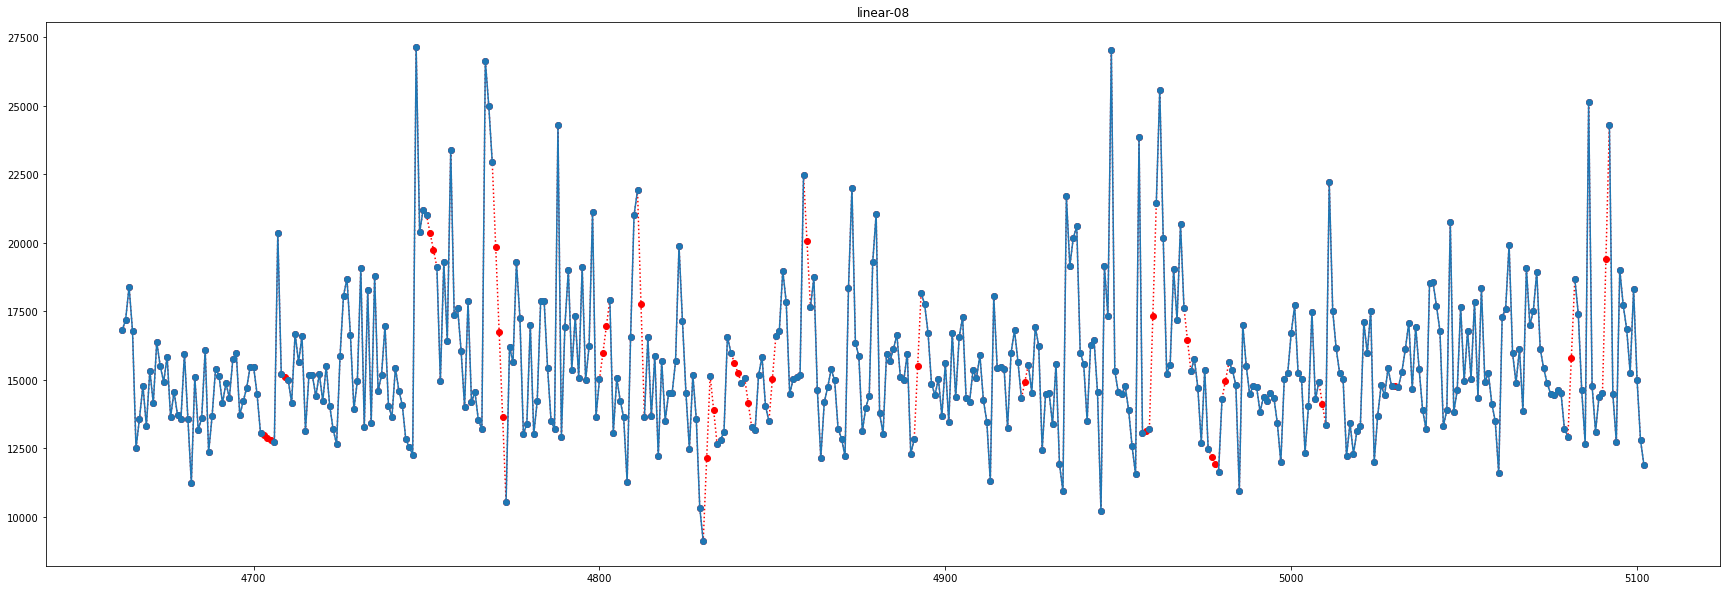

In [68]:
tmp_linear = month[7].copy()
tmp_linear["delta_t"] = tmp_linear["delta_t"].interpolate(method="linear")

tmp_linear["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 10))
month[7]["delta_t"].plot(title='linear-08', marker='o', figsize=(30, 10))


<AxesSubplot:title={'center':'linear-09'}>

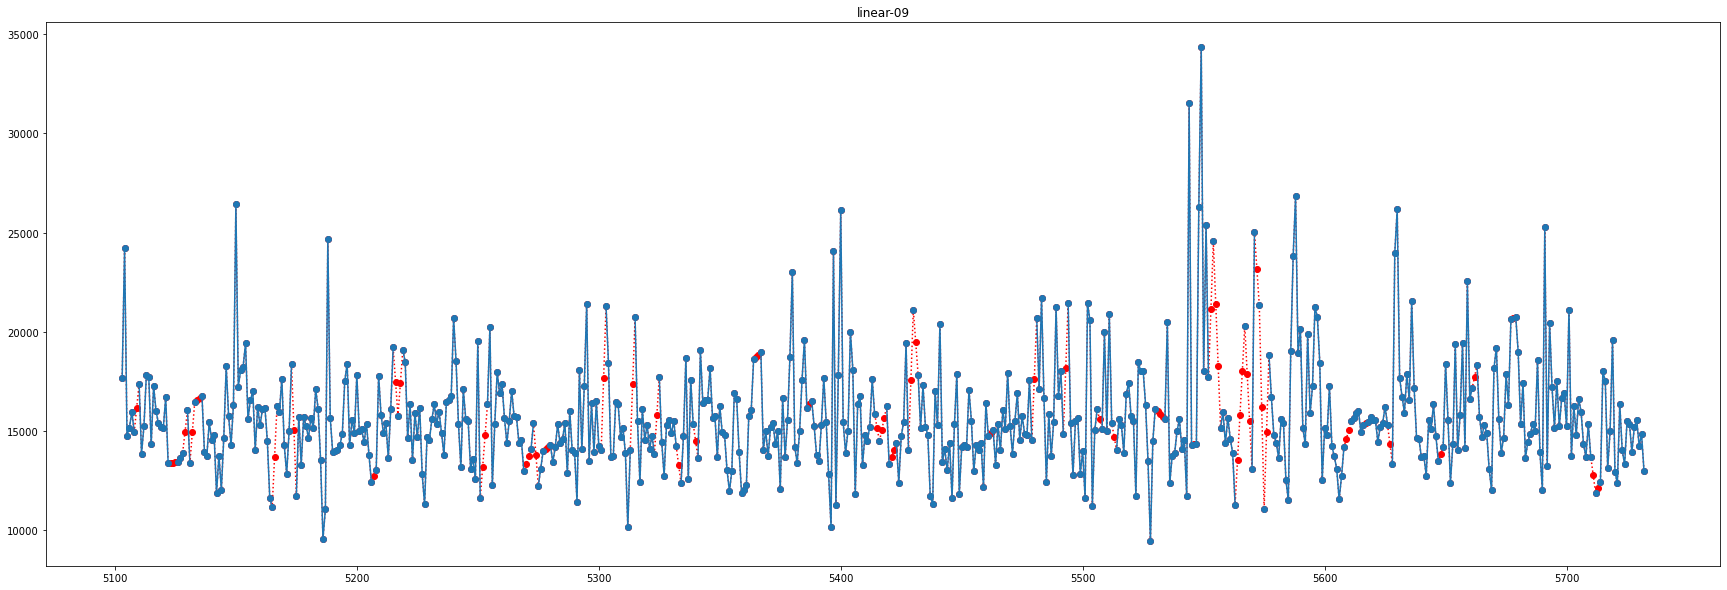

In [67]:
tmp_linear = month[8].copy()
tmp_linear["delta_t"] = tmp_linear["delta_t"].interpolate(method="linear")

tmp_linear["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 10))
month[8]["delta_t"].plot(title='linear-09', marker='o', figsize=(30, 10))


In [75]:
month[9]

datetime       delta_t  day_of_week
5733 2019-10-01 00:00:00  19896.250000          1.0
5734 2019-10-01 01:00:00  23192.500000          1.0
5735 2019-10-01 02:00:00  19486.000000          1.0
5736 2019-10-01 03:00:00  17582.500000          1.0
5737 2019-10-01 04:00:00  20698.000000          1.0
...                  ...           ...          ...
6379 2019-10-31 16:00:00  13204.666667          3.0
6380 2019-10-31 17:00:00  15685.000000          3.0
6381 2019-10-31 18:00:00  14911.857143          3.0
6382 2019-10-31 19:00:00  13440.000000          3.0
6383 2019-10-31 20:00:00  11461.000000          3.0

[651 rows x 3 columns]

<AxesSubplot:title={'center':'linear-10'}>

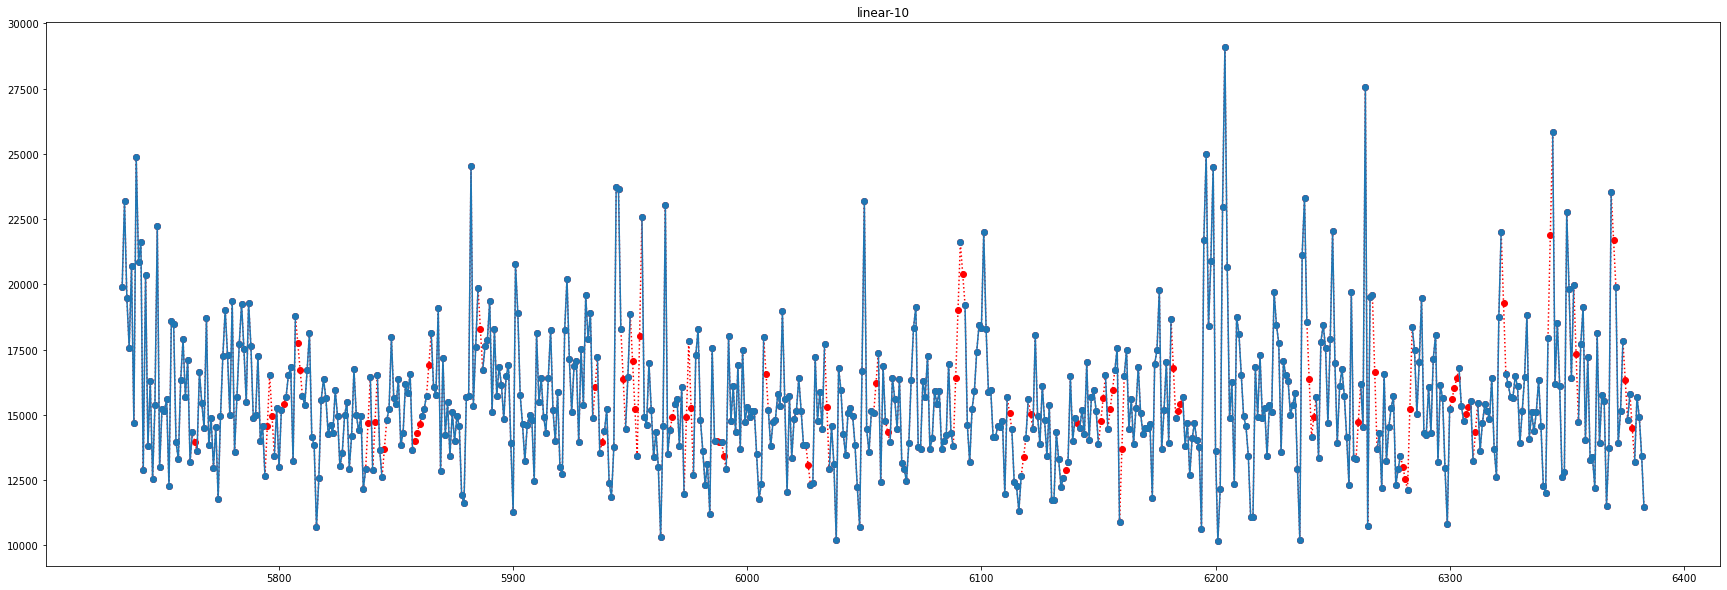

In [66]:
tmp_linear = month[9].copy()
tmp_linear["delta_t"] = tmp_linear["delta_t"].interpolate(method="linear")

tmp_linear["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 10))
month[9]["delta_t"].plot(title='linear-10', marker='o', figsize=(30, 10))


<AxesSubplot:title={'center':'linear-11'}>

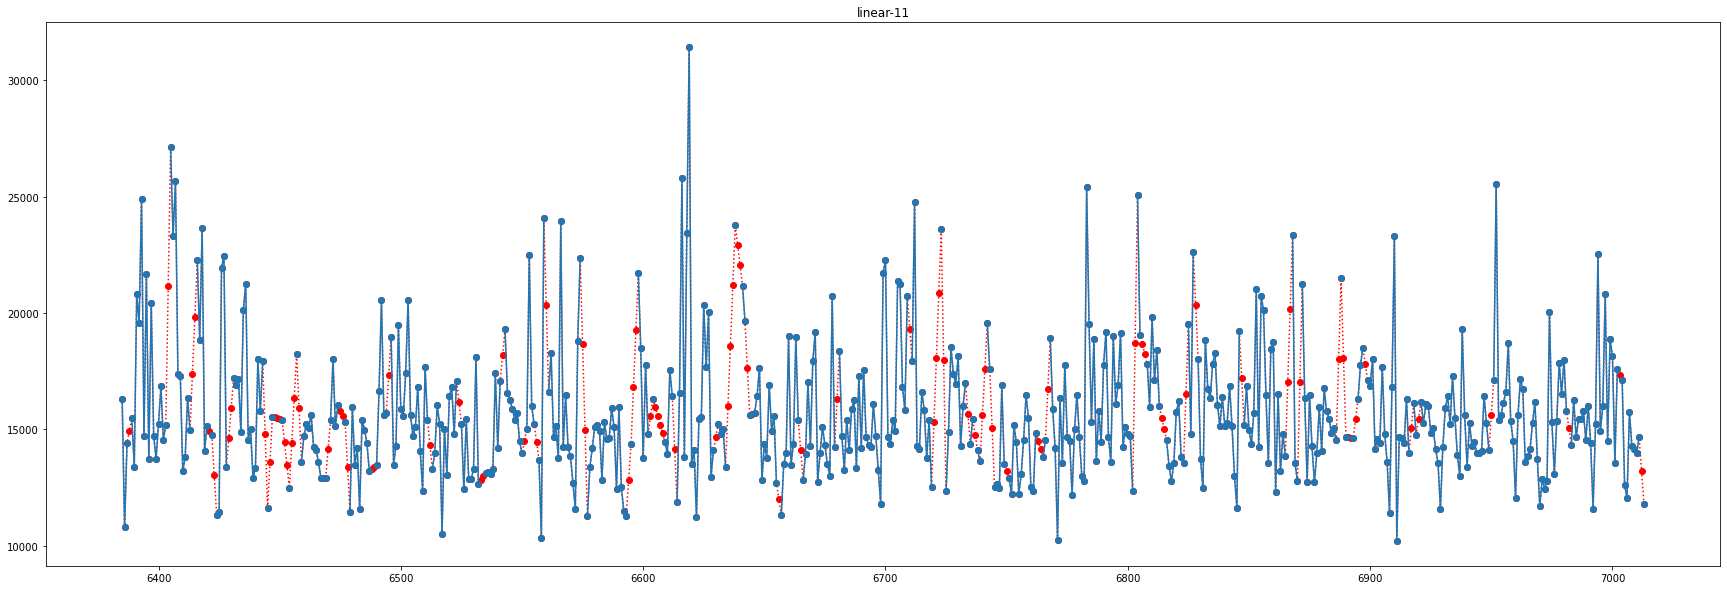

In [65]:
tmp_linear = month[10].copy()
tmp_linear["delta_t"] = tmp_linear["delta_t"].interpolate(method="linear")

tmp_linear["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 10))
month[10]["delta_t"].plot(title='linear-11', marker='o', figsize=(30, 10))


<AxesSubplot:title={'center':'linear-12'}>

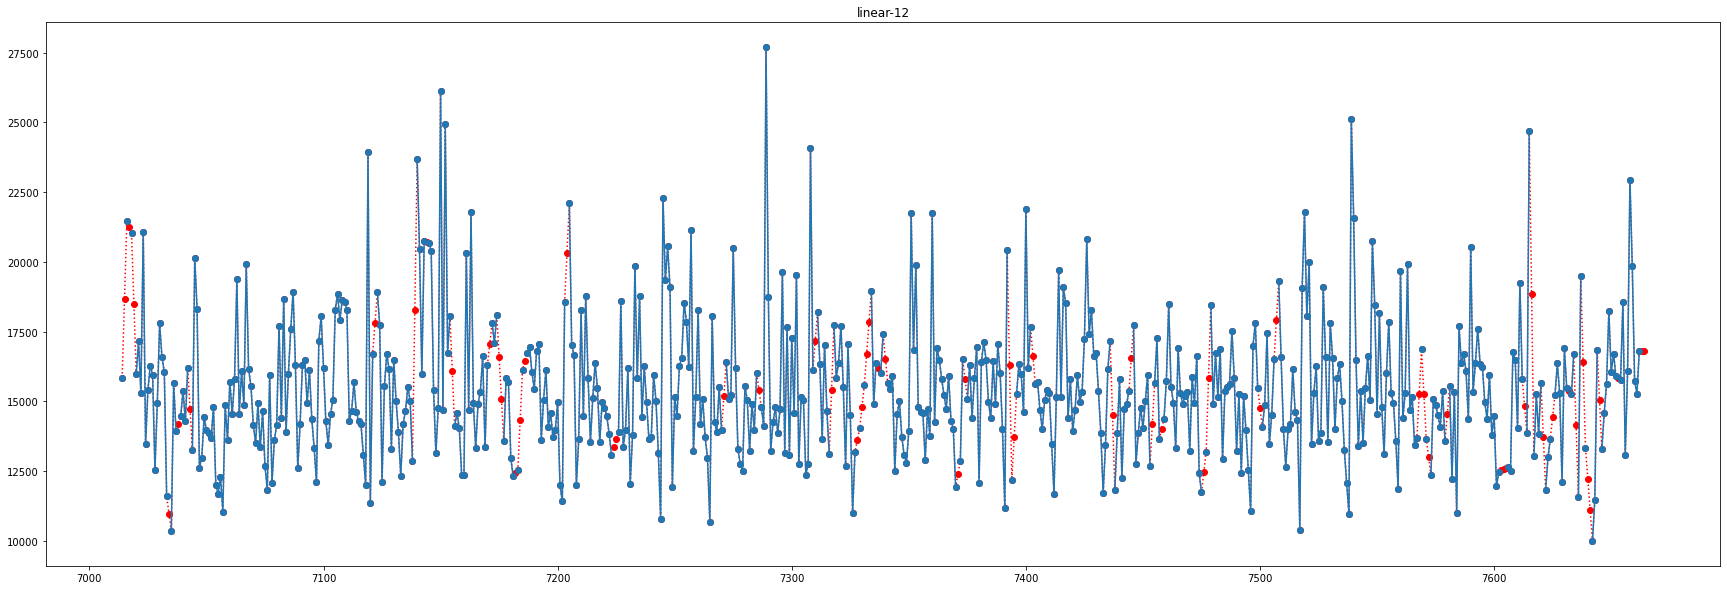

In [64]:
tmp_linear = month[11].copy()
tmp_linear["delta_t"] = tmp_linear["delta_t"].interpolate(method="linear")

tmp_linear["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 10))
month[11]["delta_t"].plot(title='linear-12', marker='o', figsize=(30, 10))


<AxesSubplot:title={'center':'quadratic'}>

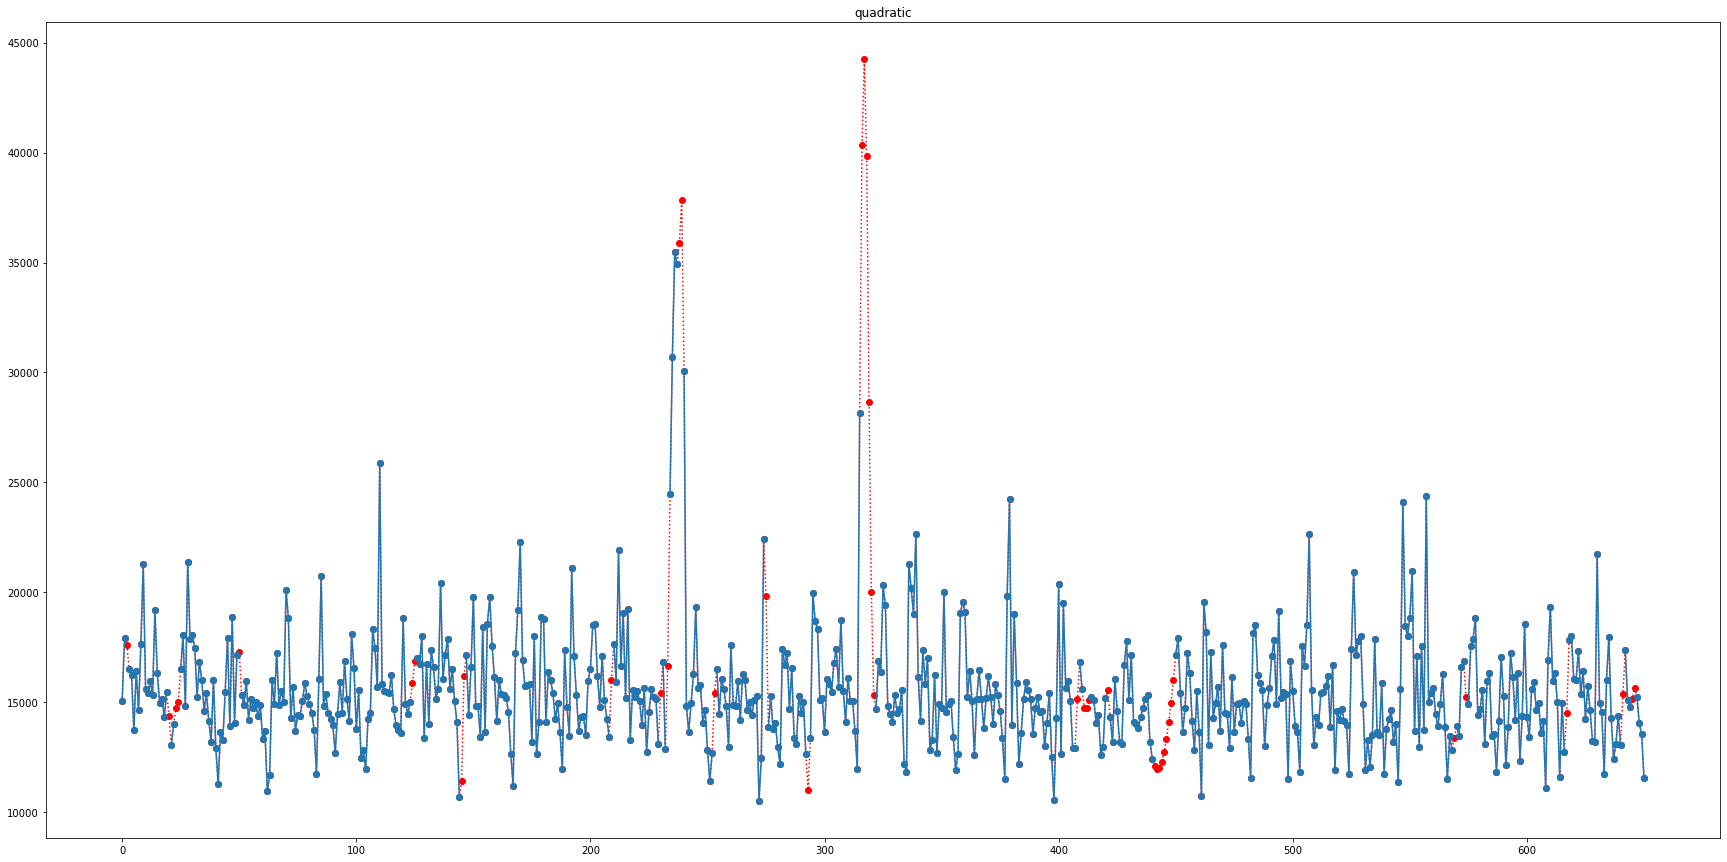

In [27]:
tmp_quad = tmp.copy()
tmp_quad["delta_t"] = tmp_quad["delta_t"].interpolate(method="quadratic")

tmp_quad["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 15))
tmp["delta_t"].plot(title='quadratic', marker='o', figsize=(30, 15))




<AxesSubplot:title={'center':'nearest'}>

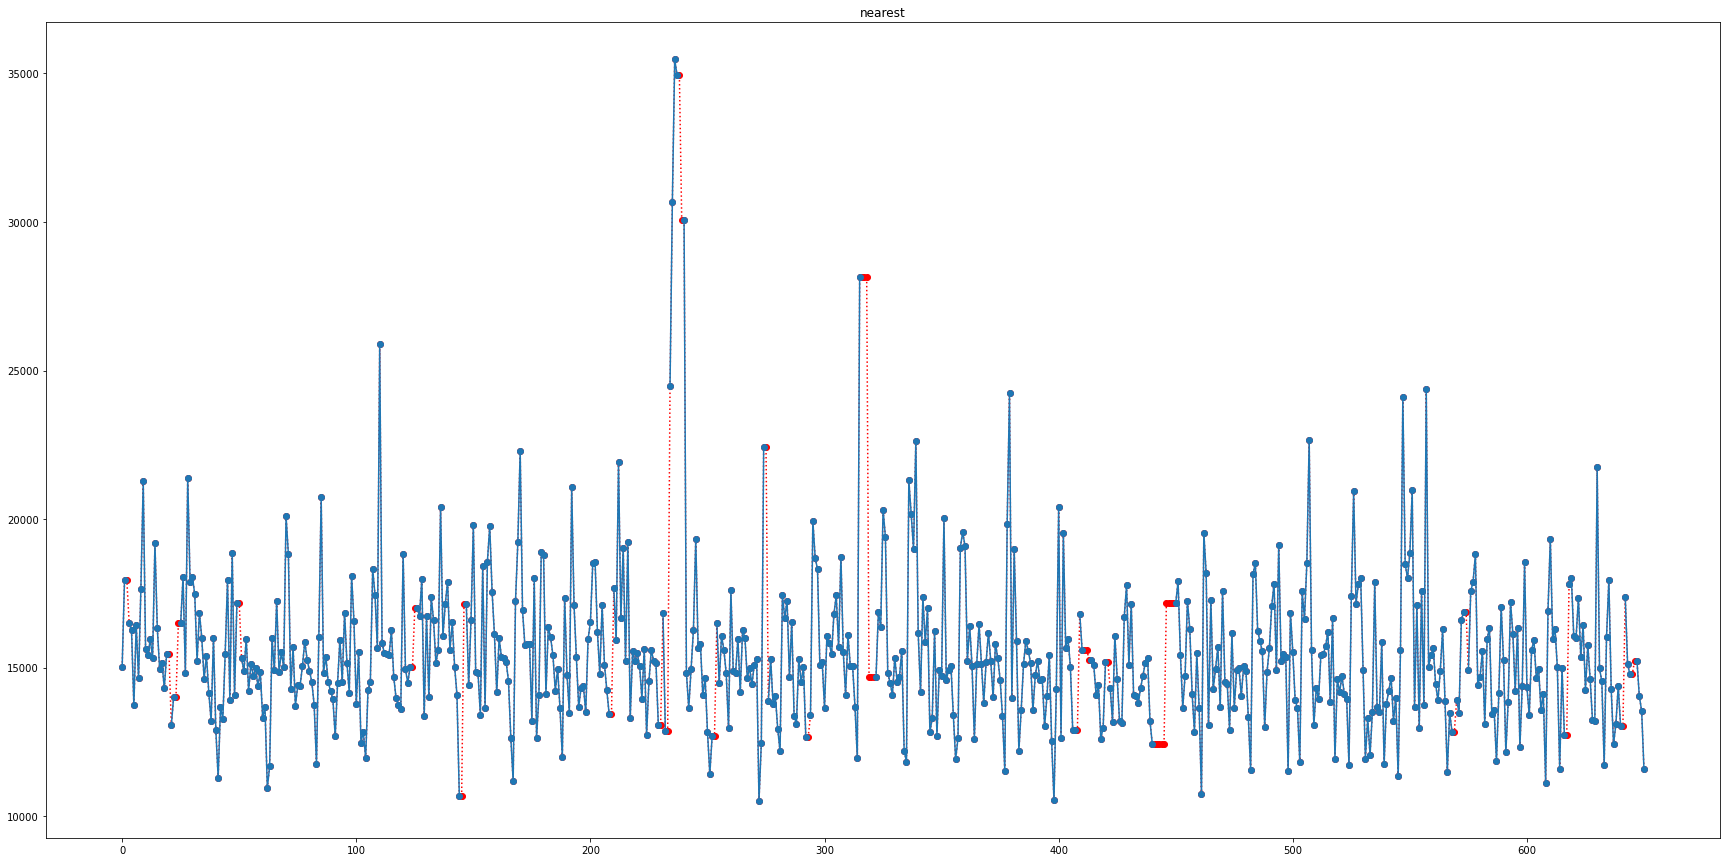

In [29]:
tmp_nearest = tmp.copy()
tmp_nearest["delta_t"] = tmp_nearest["delta_t"].interpolate(method="nearest")

tmp_nearest["delta_t"].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 15))
tmp["delta_t"].plot(title='nearest', marker='o', figsize=(30, 15))


